In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

sns.set(style="whitegrid")

In [65]:
root_path = "c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset"

os.listdir(root_path)

['Apple', 'Banana', 'Strawberry']

In [69]:
class_path = []
label_path = []
image_path = []


for fruit in os.listdir(root_path):
    fruit_path = os.path.join(root_path , fruit)
    if os.path.isdir(fruit_path):
        for status in os.listdir(fruit_path):
            status_path = os.path.join(fruit_path , status)
            if os.path.isdir(status_path):
                class_path.append(status_path)
                label_path.append(f"{fruit}-{status}")
                for img in os.listdir(status_path):
                    img_path = os.path.join(status_path , img)

                    image_path.append(img_path)



In [70]:
for label in label_path:
    print(label)

Apple-Fresh
Apple-Rotten
Banana-Fresh
Banana-Rotten
Strawberry-Fresh
Strawberry-Rotten


In [71]:
image_path

['c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).png',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).webp',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (100).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (101).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (102).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (103).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (104).jpg',
 'c:/Users/Amir/Deskt

C:\Users\Amir\AppData\Local\Temp\ipykernel_7368\4040072059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(label_count.keys()) , y = list(label_count.values()) , palette = "viridis")


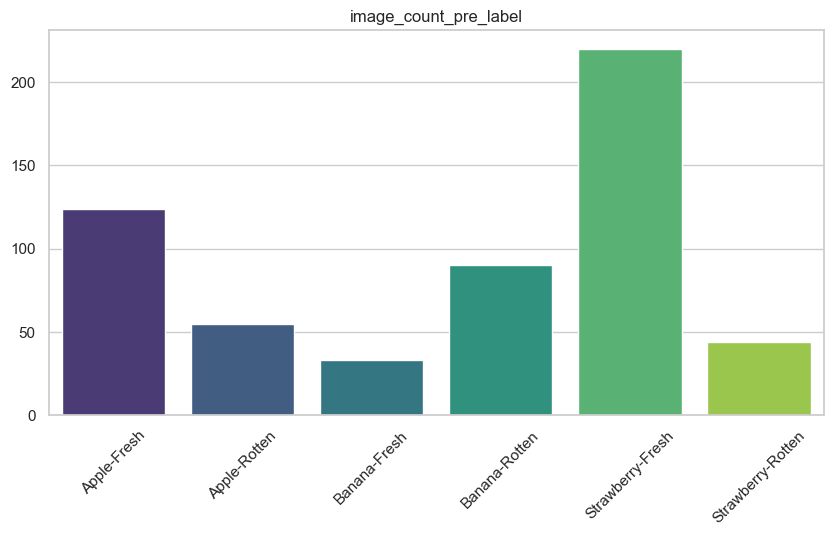

In [72]:
label_count = {label : len(os.listdir(path)) for label,path in zip(label_path , class_path)}


plt.figure(figsize = (10 , 5))
sns.barplot(x = list(label_count.keys()) , y = list(label_count.values()) , palette = "viridis")
plt.title("image_count_pre_label")
plt.xticks(rotation = 45)
plt.show()


In [73]:
print(label_count)

{'Apple-Fresh': 124, 'Apple-Rotten': 55, 'Banana-Fresh': 33, 'Banana-Rotten': 90, 'Strawberry-Fresh': 220, 'Strawberry-Rotten': 44}


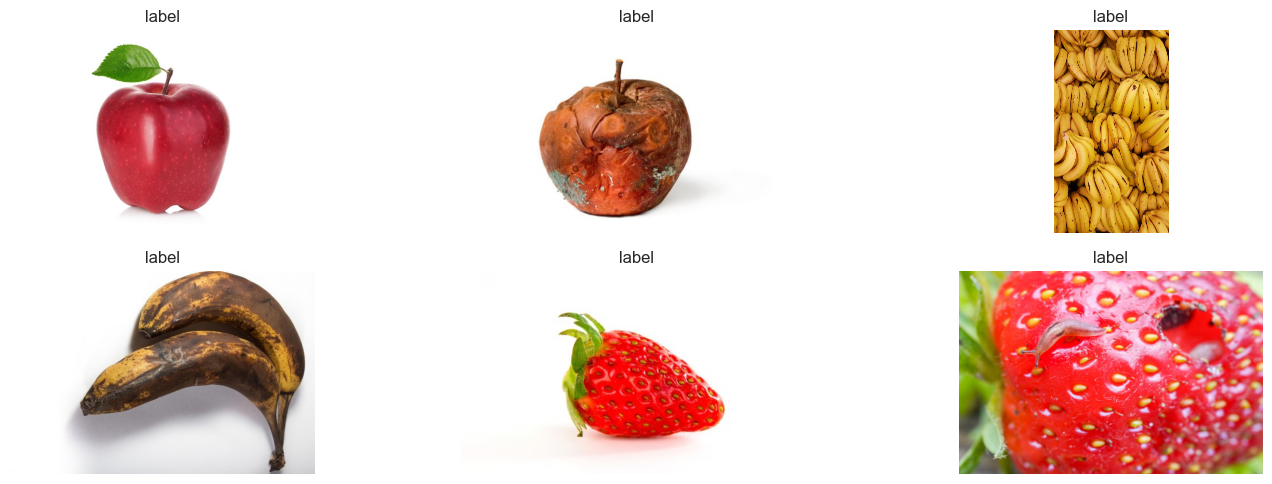

In [74]:
plt.figure(figsize=(15 , 5))

i = 1 
for path , label in zip(class_path , label_path):
    img_name = random.choice(os.listdir(path))
    img = Image.open(os.path.join(path , img_name))

    plt.subplot(2 , 3 , i)
    plt.imshow(img)
    plt.title("label")
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()


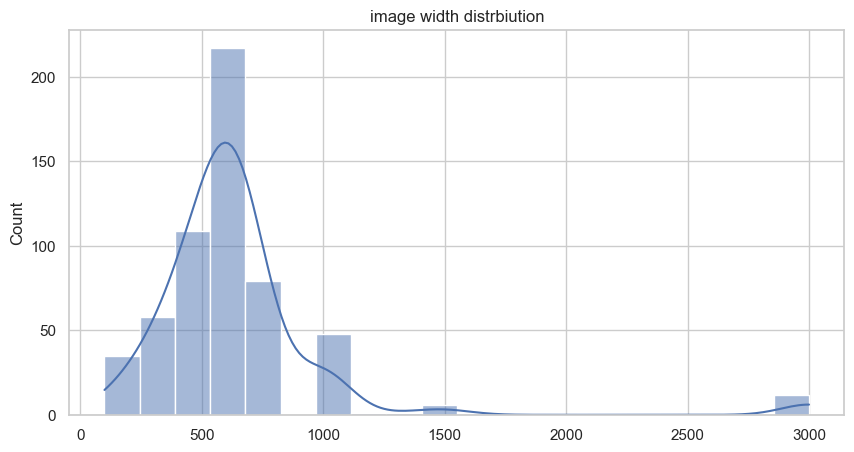

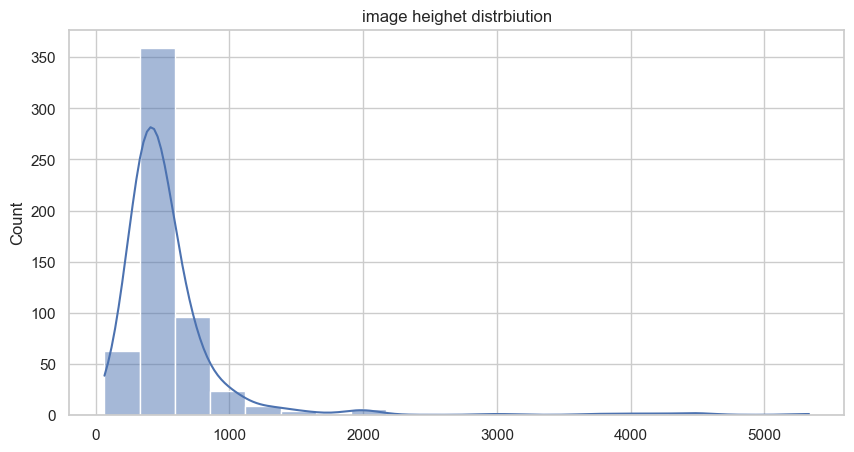

In [100]:
widths  = []
heighet = []

for path in class_path:
    for img_name in os.listdir(path):
        img = Image.open(os.path.join(path , img_name))
        w , h = img.size

        widths.append(w)
        heighet.append(h)



plt.figure(figsize=(10 , 5))
sns.histplot(widths , bins = 20 , kde = True)
plt.title("image width distrbiution")
plt.show()


plt.figure(figsize=(10 , 5))
sns.histplot(heighet , bins = 20 , kde = True)
plt.title("image heighet distrbiution")
plt.show()

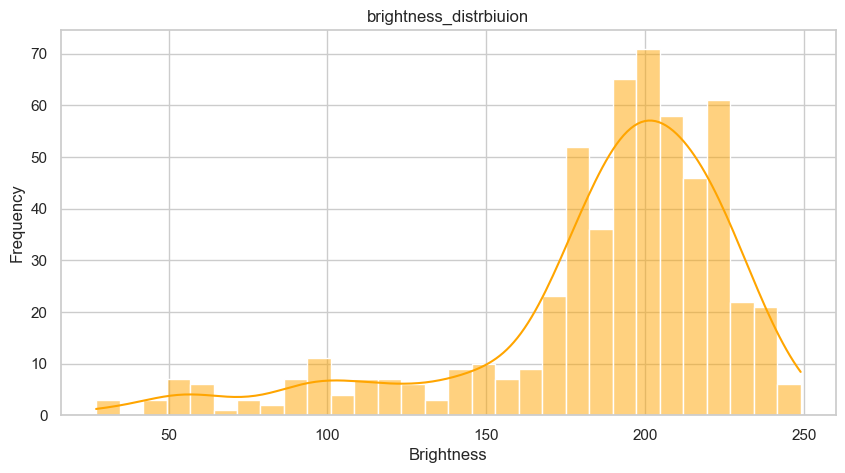

In [85]:
brightness_values = []


for path in image_path:
    img = Image.open(path)
    gray = cv2.cvtColor(np.array(img) , cv2.COLOR_RGB2GRAY)
    brightness_values.append(np.mean(gray))

plt.figure(figsize=(10, 5))
sns.histplot(brightness_values , bins=30 , kde=True , color= "orange")
plt.title("brightness_distrbiuion")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()

shape of x : (233, 12288)
num of labels : 233


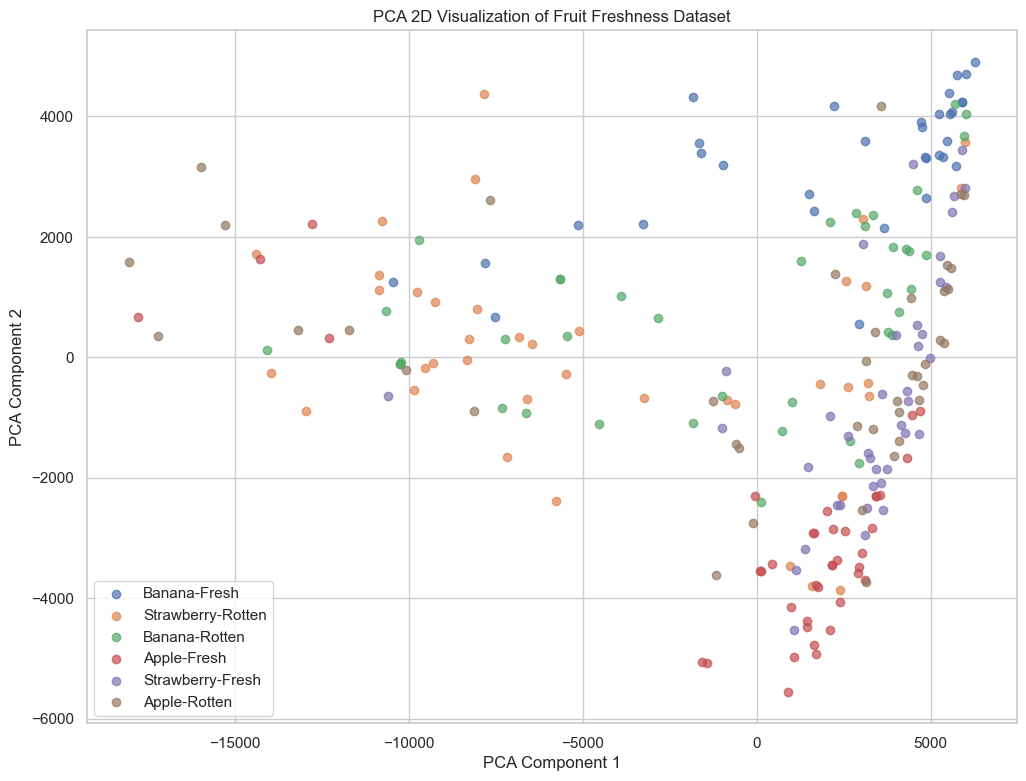

In [105]:
x = []
y = []

for path , label in zip(class_path , label_path):
    for img_name in os.listdir(path)[:40]:
        img_path = os.path.join(path , img_name)
        img = Image.open(img_path).convert("RGB")
        img = img.resize((64 , 64))
        x.append(np.array(img).flatten())
        y.append(label)

x = np.array(x)
y = np.array(y)
print("shape of x :" , x.shape)
print("num of labels :", len(y))




pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x)




plt.figure(figsize=(12 , 9))
for label in set(y):
    idx = np.where(y == label)
    plt.scatter(x_pca[idx , 0] , x_pca[idx , 1] , label = label , alpha=0.7)

plt.title("PCA 2D Visualization of Fruit Freshness Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()